In [15]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [16]:
import shap
import pandas as pd

In [17]:
dataframe = pd.read_csv('./stores_sales_forecasting.csv', encoding='ISO-8859-1')

In [18]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


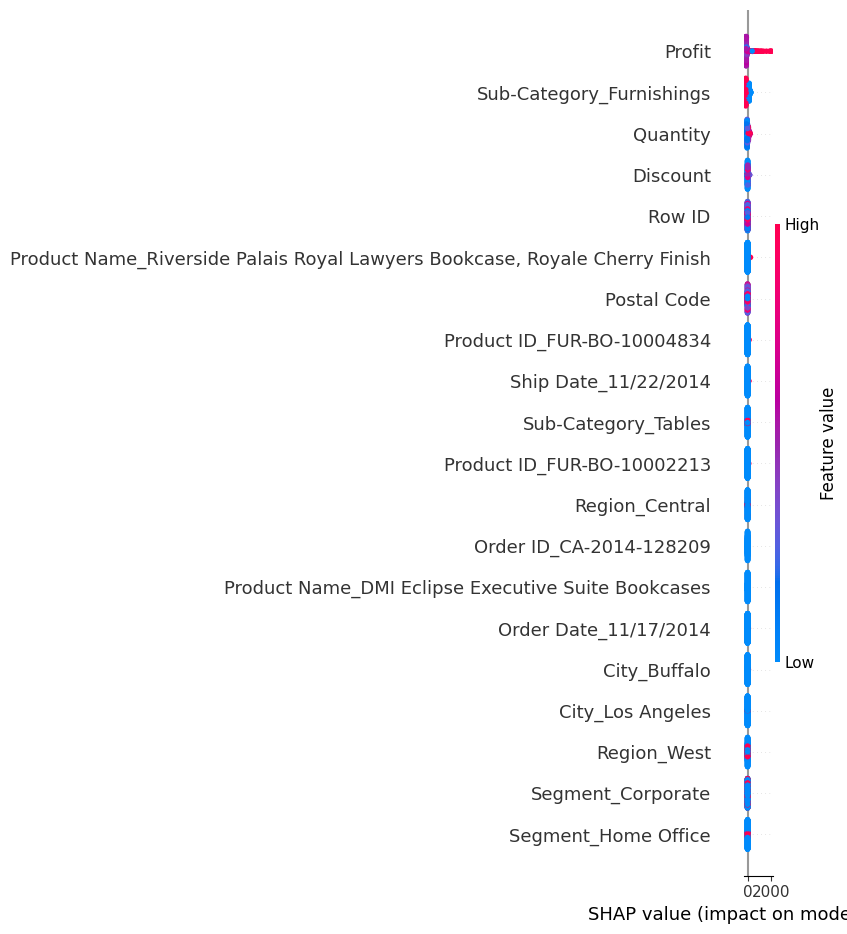

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = dataframe.drop(columns=['Sales'])
y = dataframe['Sales']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)
